In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.decomposition import PCA
from sklearn import svm

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 1. Import the data. Analyse the dimensions of the data. Visualise the data.

In [76]:
training_data = tf.keras.utils.image_dataset_from_directory(
  directory='./train',
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=32)

validation_data = tf.keras.utils.image_dataset_from_directory(
  directory='./train',
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=32)

Found 4767 files belonging to 12 classes.
Using 3814 files for training.
Found 4767 files belonging to 12 classes.
Using 953 files for validation.


In [134]:
print('Total number of batches (of size 32) in the training data:', len(training_data))
print('Shape and type of each batch in the training data:', training_data)

Total number of batches (of size 32) in the training data: 120
Shape and type of each batch in the training data: <BatchDataset shapes: ((None, 256, 256, 3), (None, 12)), types: (tf.float32, tf.float32)>


In [77]:
training_data.class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [135]:
print('Total number of batches (of size 32) in the validation data:', len(validation_data))
print('Shape and type of each batch in the validation data:', validation_data)

Total number of batches (of size 32) in the validation data: 30
Shape and type of each batch in the validation data: <BatchDataset shapes: ((None, 256, 256, 3), (None, 12)), types: (tf.float32, tf.float32)>


In [78]:
validation_data.class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [79]:
class_labels = training_data.class_names
print(class_labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


- Here we plot one image for each class.

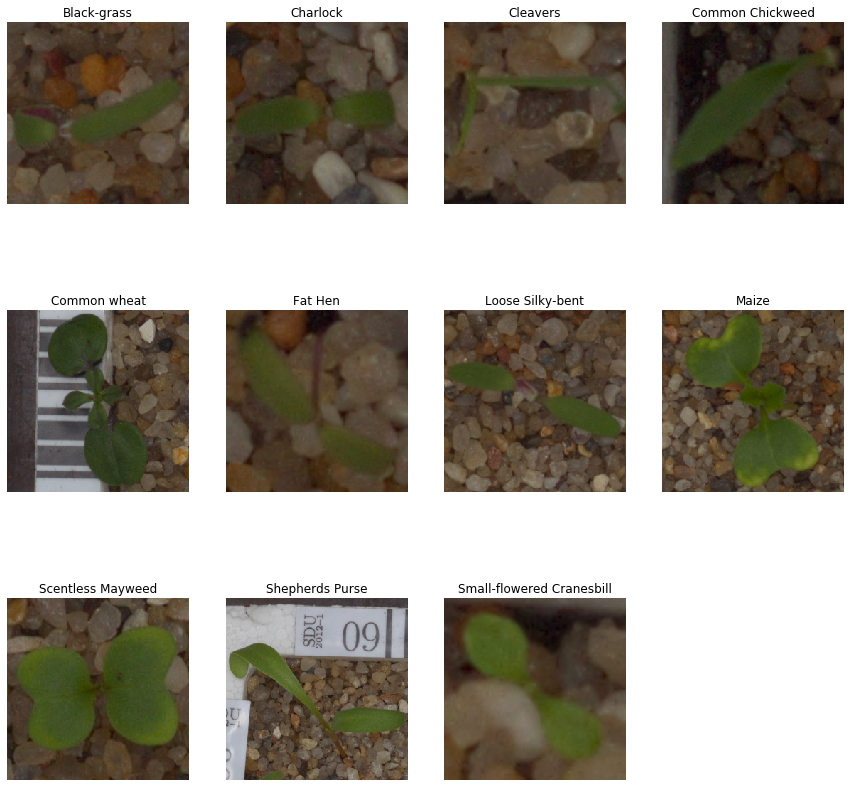

In [122]:
plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
    for i in range(11):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 2.1 Design, train, tune and test the best AIML image classifier model using supervised learning algorithm:

- Here, we import and resize the images to (64,64,3) due to the disk space constraint of the present notebook.
- We also employ the Principal Component Analysis to reduce the dimensions further and extract important features from the data.
- Here, we use Support Vector Machine (SVM) for classification of images. 

In [2]:
features_array=[] 
class_array=[] 
img_data_dir='./train' 

for i in class_labels:
    print(f'Loading {i} images.')
    path=os.path.join(img_data_dir,i)
    for img in os.listdir(path):
        img_original=imread(os.path.join(path,img))
        img_resized=resize(img_original,(64,64,3))
        features_array.append(img_resized.flatten())
        class_array.append(class_labels.index(i))
        
img_data=pd.DataFrame(np.array(features_array)) 
img_data['Class']=np.array(class_array)

Loading Black-grass images.
Loading Charlock images.
Loading Cleavers images.
Loading Common Chickweed images.
Loading Common wheat images.
Loading Fat Hen images.
Loading Loose Silky-bent images.
Loading Maize images.
Loading Scentless Mayweed images.
Loading Shepherds Purse images.
Loading Small-flowered Cranesbill images.
Loading Sugar beet images.


In [3]:
print('Shape of the original image is ', img_original.shape)
print('Shape of the resized image is ', img_resized.shape)

Shape of the original image is  (478, 478, 3)
Shape of the resized image is  (64, 64, 3)


In [4]:
img_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Class
0,0.310539,0.196818,0.103064,0.354389,0.264794,0.186485,0.395221,0.321117,0.245872,0.386179,...,0.555760,0.583701,0.615074,0.520822,0.540196,0.568015,0.292651,0.285172,0.308582,0
1,0.231618,0.195217,0.171687,0.278665,0.223518,0.195577,0.379883,0.318260,0.253657,0.419485,...,0.369344,0.275368,0.193156,0.370711,0.304791,0.238971,0.368627,0.305021,0.242276,0
2,0.227451,0.158517,0.107537,0.227890,0.164706,0.118087,0.267096,0.200181,0.145527,0.326961,...,0.486275,0.474510,0.467096,0.453687,0.444179,0.439216,0.423529,0.415686,0.412721,0
3,0.411768,0.317650,0.186615,0.417428,0.326956,0.193622,0.425941,0.332498,0.199003,0.441061,...,0.362675,0.314221,0.257857,0.365936,0.310360,0.257363,0.366170,0.304771,0.257435,0
4,0.654902,0.658245,0.663323,0.647763,0.651685,0.657721,0.651685,0.654902,0.667371,0.651685,...,0.188235,0.124857,0.089491,0.192935,0.135141,0.092004,0.220837,0.167923,0.120864,0


In [5]:
X=img_data.iloc[:,:-1]  
y=img_data.iloc[:,-1] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
pca = PCA(n_components=3000)
pca.fit(X_train)

PCA(n_components=3000)

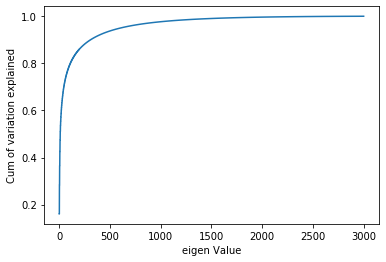

In [8]:
plt.step(list(range(1,3001)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variance explained')
plt.xlabel('Eigen Value')
plt.title('Variance explained by the principal components')
plt.show()

- From the graph titled 'Variance explained by the principal components', we can say that most of the variance in the data is explained by the first 1000 eigen values.

In [9]:
pca1000 = PCA(n_components=1000)
pca1000.fit(X_train)
Xpca1000_train = pca1000.transform(X_train)
Xpca1000_test = pca1000.transform(X_test)

In [10]:
svm_clf = svm.SVC()
svm_clf.fit(Xpca1000_train , y_train)
svm_clf.score(Xpca1000_test , y_test)

0.49825296995108315

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 2.2 Design, train, tune and test the best AIML image classifier model using fully connected Neural Network (NN):

- We used an input of shape (256,256,3) in 32 batches to train the NN.
- We employed 6 layers with 128 nodes each after flattening the input data.
- We used 'relu' and 'softmax' as the activation functions for the hidden layers and the output layer respectively.
- The kernel is initialized with the 'he_normal' initializer and 50% of the neurons are dropped out to prevent the over fitting of the model.

In [48]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout = tf.keras.models.Sequential()
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.5))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(12, activation="softmax"))

In [171]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [49]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_batchNormalization_wt_ini_dropout = model_NN_imageClassifier_batchNormalization_wt_ini_dropout.fit(training_data, batch_size=32, epochs=100, validation_data=validation_data)

Epoch 1/100
120/120 [==============================] - 16s 113ms/step - loss: 3.5786 - accuracy: 0.0891 - val_loss: 2.6739 - val_accuracy: 0.1049
Epoch 2/100
120/120 [==============================] - 13s 108ms/step - loss: 3.3155 - accuracy: 0.0878 - val_loss: 2.4750 - val_accuracy: 0.0871
Epoch 3/100
120/120 [==============================] - 14s 116ms/step - loss: 3.0501 - accuracy: 0.0954 - val_loss: 2.4436 - val_accuracy: 0.1364
Epoch 4/100
120/120 [==============================] - 14s 115ms/step - loss: 2.8723 - accuracy: 0.1015 - val_loss: 2.4338 - val_accuracy: 0.1396
Epoch 5/100
120/120 [==============================] - 14s 115ms/step - loss: 2.7857 - accuracy: 0.0983 - val_loss: 2.4190 - val_accuracy: 0.1175
Epoch 6/100
120/120 [==============================] - 14s 115ms/step - loss: 2.6983 - accuracy: 0.1078 - val_loss: 2.4148 - val_accuracy: 0.1406
Epoch 7/100
120/120 [==============================] - 14s 116ms/step - loss: 2.6356 - accuracy: 0.1072 - val_loss: 2.4072 -

- Here, we plot the loss and the accuracy obtained during the training and validation process using NNs.

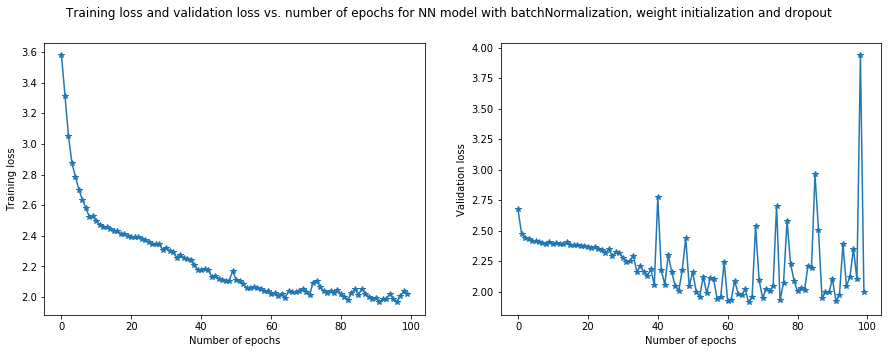

In [67]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with batchNormalization, weight initialization and dropout')

ax[0].plot(range(len(history_batchNormalization_wt_ini_dropout.history['loss'])), history_batchNormalization_wt_ini_dropout.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_batchNormalization_wt_ini_dropout.history['val_loss'])), history_batchNormalization_wt_ini_dropout.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

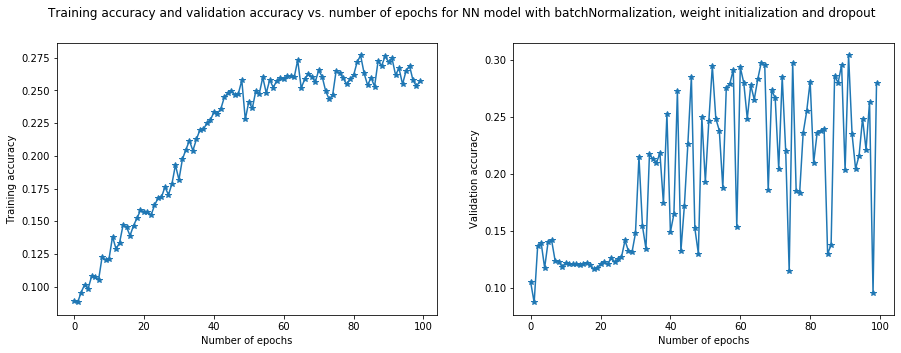

In [66]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with batchNormalization, weight initialization and dropout')

ax[0].plot(range(len(history_batchNormalization_wt_ini_dropout.history['accuracy'])), history_batchNormalization_wt_ini_dropout.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_batchNormalization_wt_ini_dropout.history['val_accuracy'])), history_batchNormalization_wt_ini_dropout.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 2.3 Design, train, tune and test the best AIML image classifier model using Convoluted Neural Network (CNN):

- As in the previous case, the input size is (256,256,3).
- Here, we use 3 convolution layers with 32 filters and kernel size of (3,3).
- A maxpooling layer of pool size (2,2) is added after each convolution layer for the sake of reducing the dimensions.
- The 'relu' activation function is used in the convolution layers and the fully connected hidden layer while 'softmax' is considered for the output layer.
- A dropout rate of 0.5 is considered at the fully connected hidden layer. 

In [136]:
model_CNN_imageClassifier_dropout=tf.keras.models.Sequential()
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Flatten())
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Dense(128,activation='relu'))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Dropout(0.5))
model_CNN_imageClassifier_dropout.add(tf.keras.layers.Dense(12,activation='softmax'))

In [172]:
model_CNN_imageClassifier_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [137]:
model_CNN_imageClassifier_dropout.compile(loss="categorical_crossentropy",metrics=['accuracy'])
history_CNN_imageClassifier_dropout = model_CNN_imageClassifier_dropout.fit(training_data, batch_size=32, epochs=50, validation_data=validation_data)

Epoch 1/50
120/120 [==============================] - 141s 1s/step - loss: 9.9178 - accuracy: 0.1479 - val_loss: 2.4510 - val_accuracy: 0.1427
Epoch 2/50
120/120 [==============================] - 121s 1s/step - loss: 3.1478 - accuracy: 0.1384 - val_loss: 2.4244 - val_accuracy: 0.1427
Epoch 3/50
120/120 [==============================] - 121s 1s/step - loss: 2.7616 - accuracy: 0.1547 - val_loss: 2.4164 - val_accuracy: 0.1249
Epoch 4/50
120/120 [==============================] - 121s 1s/step - loss: 2.8272 - accuracy: 0.1631 - val_loss: 2.4097 - val_accuracy: 0.1196
Epoch 5/50
120/120 [==============================] - 119s 989ms/step - loss: 2.6054 - accuracy: 0.1846 - val_loss: 2.6083 - val_accuracy: 0.1343
Epoch 6/50
120/120 [==============================] - 119s 991ms/step - loss: 2.5525 - accuracy: 0.2111 - val_loss: 2.9090 - val_accuracy: 0.1406
Epoch 7/50
120/120 [==============================] - 118s 977ms/step - loss: 2.3159 - accuracy: 0.2436 - val_loss: 2.4982 - val_accurac

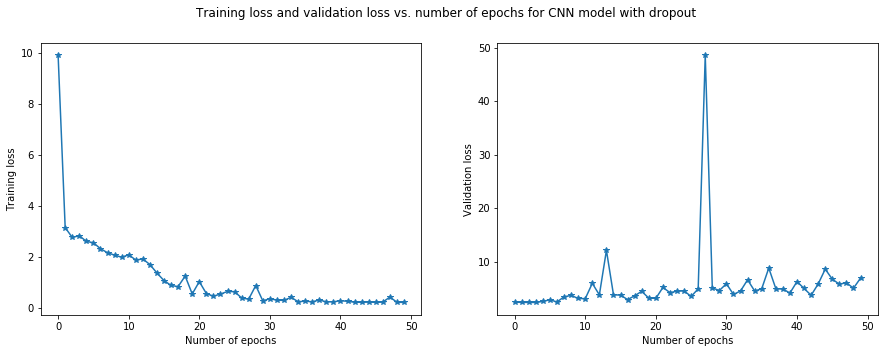

In [138]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for CNN model with dropout')

ax[0].plot(range(len(history_CNN_imageClassifier_dropout.history['loss'])), history_CNN_imageClassifier_dropout.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_CNN_imageClassifier_dropout.history['val_loss'])), history_CNN_imageClassifier_dropout.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

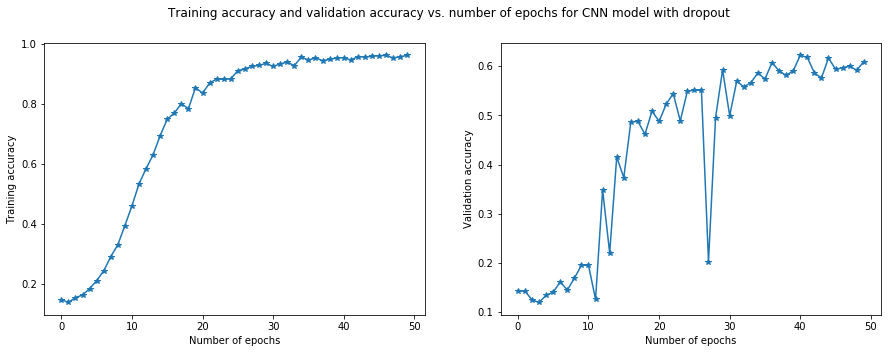

In [139]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for CNN model with dropout')

ax[0].plot(range(len(history_CNN_imageClassifier_dropout.history['accuracy'])), history_CNN_imageClassifier_dropout.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_CNN_imageClassifier_dropout.history['val_accuracy'])), history_CNN_imageClassifier_dropout.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 3. Comparisons

- The accuracy on the test data achieved using SVM is around 50% which is a low value. This might be due to the overfitting of the model on the training data which prevents it from generalizing.
- Similarly, the accuracy on the training and the testing data is saturated around 27% and 30% respectively using NN. This might be due to the vanishing gradient problem of this model.
- However, using CNN, the accuracy around 96% is achieved on the training data and the accuracy around 60% is achieved on the validation data. This observation is due to the fact that using CNN, the important feature maps are extracted for training the fully conncted layers rather than using the raw data directly for this purpose. This will prevent the overfitting of the data and gives a more generalized model.
### From these observations we conclude that the CNN is the best performing model on the given data.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4. Pickle the best performing model

In [153]:
model_CNN_imageClassifier_dropout.save('saved_model_NN_signal.h5')
model_CNN_imageClassifier_dropout.save_weights('saved_model_weights_NN_signal.h5')

In [154]:
model_CNN_imageClassifier_dropout = tf.keras.models.load_model('saved_model_NN_signal.h5')

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 5.1 Predictions using supervised learning model

In [162]:
predict_features_array = []
predict_img_original=imread('./Predict.png')
predict_img_resized=resize(predict_img_original,(64,64,3))
predict_features_array.append(predict_img_resized.flatten())
predict_features_data = pd.DataFrame(np.array(predict_features_array))
predict_features_data.shape

(1, 12288)

In [163]:
Xpca1000_predict = pca1000.transform(predict_features_data)
predicted_label_id = svm_clf.predict(Xpca1000_predict)
print(f"The given image is predicted as '{class_labels[predicted_label_id[0]]}' using SVM classifier.")

The given image is predicted as 'Common Chickweed' using SVM classifier.


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 5.2 Predictions using fully connected neural networks

In [164]:
prediction_img = tf.keras.utils.load_img('./Predict.png', target_size=(256,256,3))
prediction_data = tf.keras.preprocessing.image.img_to_array(prediction_img)
prediction_data = np.array([prediction_data]) 

In [165]:
prediction_class_prob_NN = model_NN_imageClassifier_batchNormalization_wt_ini_dropout.predict(prediction_data)
print(prediction_class_prob_NN)

[[0.0013993  0.15560748 0.0333428  0.28792357 0.00173446 0.00907444
  0.00228762 0.08034015 0.15449648 0.09776108 0.16435356 0.01167912]]


In [177]:
print(f"The given image is predicted as '{class_labels[np.argmax(prediction_class_prob[0])]}' using fully connected neural network.")

The given image is predicted as 'Common Chickweed' using fully connected neural network.


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 5.3 Predictions using convoluted neural networks

In [167]:
prediction_class_prob_CNN = model_CNN_imageClassifier_dropout.predict(prediction_data)
print(prediction_class_prob_CNN)

[[1.0297802e-17 9.7709866e-18 1.9784469e-11 1.0976339e-26 2.7422322e-18
  3.4821514e-11 1.9774067e-10 1.0000000e+00 1.7774676e-26 3.6827446e-21
  1.7070481e-18 1.0910365e-14]]


In [176]:
print(f"The given image is predicted as '{class_labels[np.argmax(prediction_class_prob_CNN[0])]}' using convoluted neural network.")

The given image is predicted as 'Maize' using convoluted neural network.


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 6 Conclusions

- We observed that the run time of the CNN model is more than twice of that of the NN model even though the former has around 7.43 million trainable parameters while the latter has around 25.25 million trainable parameters. This might be because of the complex matrix multiplications involved in the CNN model.
- It is interesting to observe that the given image is predicted as 'Common Chickweed' using SVM and fully connected neural network which has low accuracy rates on the test data.
- After visual inspection of the given image, the prediction by the convoluted neural network as 'Maize' seems to be satisfactory as far as this excercise is concerned. 